<a href="https://colab.research.google.com/github/AdeelAhmed2001/deep-learning-assignments/blob/main/Concerte_Strength_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
data=pd.read_csv("compresive_strength_concrete.csv")
display(data.head(n=5))

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.shape

(1030, 9)

In [ ]:
data.ndim

2

In [ ]:
data.iloc[4]

Cement (component 1)(kg in a m^3 mixture)                198.6
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    132.4
Fly Ash (component 3)(kg in a m^3 mixture)                 0.0
Water  (component 4)(kg in a m^3 mixture)                192.0
Superplasticizer (component 5)(kg in a m^3 mixture)        0.0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     978.4
Fine Aggregate (component 7)(kg in a m^3 mixture)        825.5
Age (day)                                                360.0
Concrete compressive strength(MPa, megapascals)           44.3
Name: 4, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
pd.isnull(data).sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
pd.isnull(data)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [ ]:
x=data.iloc[0:,0:8]
y=data.iloc[0:,8]


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [ ]:
test_data.iloc[4]

Cement (component 1)(kg in a m^3 mixture)               -1.286565
Blast Furnace Slag (component 2)(kg in a m^3 mixture)   -0.854703
Fly Ash (component 3)(kg in a m^3 mixture)               1.993364
Water  (component 4)(kg in a m^3 mixture)                0.954404
Superplasticizer (component 5)(kg in a m^3 mixture)      0.309809
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -1.908034
Fine Aggregate (component 7)(kg in a m^3 mixture)        1.215115
Age (day)                                               -0.292777
Name: 918, dtype: float64

In [ ]:
train_data=np.asarray(train_data)
test_data=np.asarray(test_data)

In [ ]:
train_data[43]

array([ 1.52904594, -0.28469113, -0.81634643,  0.85987838, -0.51712886,
        1.91826305, -1.97735758, -0.29277718])

In [ ]:
test_data[3]

array([ 0.72155356,  1.29994103, -0.81634643, -0.79904003,  0.90520489,
       -0.3706372 , -0.19766029, -0.69828729])

In [ ]:
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

In [ ]:
train_labels[23:45]

array([36.45, 77.3 , 25.56, 38.46, 23.52, 21.86, 37.81, 19.69, 37.43,
       26.05, 38.89, 26.15, 11.48, 33.06, 15.69, 67.31, 28.63, 32.07,
       39.45, 39.23, 39.38, 27.34])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(8,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history=model.fit(train_data,train_labels,epochs=50,validation_split=0.20,batch_size=26)

Epoch 1/50
23/23 [==============================] - 0s 7ms/step - loss: 106.7468 - mae: 8.3638 - val_loss: 109.6283 - val_mae: 8.3053
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 106.6629 - mae: 8.3079 - val_loss: 111.1402 - val_mae: 8.6806
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 104.6250 - mae: 8.2191 - val_loss: 109.2065 - val_mae: 8.5174
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 103.2056 - mae: 8.1524 - val_loss: 107.3617 - val_mae: 8.4934
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 102.0398 - mae: 8.0993 - val_loss: 105.4102 - val_mae: 8.2553
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 100.2478 - mae: 8.0536 - val_loss: 107.1779 - val_mae: 8.5346
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 99.3126 - mae: 7.9310 - val_loss: 104.9916 - val_mae: 8.3591
Epoch 8/50
23/23 [==============================] - 0s 4ms/step

In [ ]:
test_loss,test_mae=model.evaluate(test_data,test_labels)
print("test_loss:",test_loss,"mae:",test_mae)


10/10 [==============================] - 0s 2ms/step - loss: 51.5760 - mae: 5.6278
test_loss: 51.57604217529297 mae: 5.627843379974365


In [ ]:
model.predict(test_data)[0:3]

array([[44.143764],
       [50.629456],
       [65.93279 ]], dtype=float32)

In [ ]:
 history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

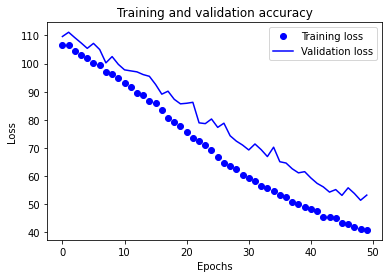

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(50)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

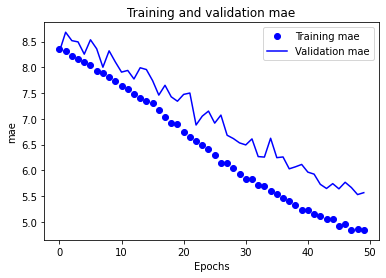

In [ ]:
mae = history_dict['mae'] 
val_mae = history_dict['val_mae'] 
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae') 
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae') 
plt.legend()
plt.show()